In [100]:
import pandas as pd

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [103]:
df = pd.read_csv("vehicles.csv")

C:\Users\tabis\AppData\Local\Temp\ipykernel_12536\3059042137.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vehicles.csv")


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42215 entries, 0 to 42214
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        42215 non-null  float64
 1   barrelsA08       42215 non-null  float64
 2   charge120        42215 non-null  float64
 3   charge240        42215 non-null  float64
 4   city08           42215 non-null  int64  
 5   city08U          42215 non-null  float64
 6   cityA08          42215 non-null  int64  
 7   cityA08U         42215 non-null  float64
 8   cityCD           42215 non-null  float64
 9   cityE            42215 non-null  float64
 10  cityUF           42215 non-null  float64
 11  co2              42215 non-null  int64  
 12  co2A             42215 non-null  int64  
 13  co2TailpipeAGpm  42215 non-null  float64
 14  co2TailpipeGpm   42215 non-null  float64
 15  comb08           42215 non-null  int64  
 16  comb08U          42215 non-null  float64
 17  combA08     

In [105]:
df.describe(include='object')

,drive,eng_dscr,fuelType,fuelType1,make,model,mpgData,trany,VClass,guzzler,...,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop
count,41026,25888,42215,42215,42215,42215,42215,42204,42215,2481,...,3759,1671,1666,1006,11397,101,95,42215,42215,10511
unique,7,560,14,6,137,4214,2,38,34,3,...,8,4,231,168,49,5,7,310,175,2
top,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Chevrolet,F150 Pickup 2WD,N,Automatic 4-spd,Compact Cars,G,...,FFV,E85,290,288V Ni-MH,GMX,standard charger,80 amp dual charger,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,N
freq,14506,8827,26903,28325,4086,224,28919,11048,5980,1502,...,1466,1466,74,131,1639,90,55,34217,29343,6663


In [106]:
df.describe(include=['int','float'])

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,42215.000000,42215.000000,42215.0,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,...,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000
mean,17.210409,0.221828,0.0,0.054338,18.508895,6.432943,0.724577,0.582791,0.000450,0.393229,...,23.404218,0.946066,34.549509,1.226881,2002.004761,-3170.431126,0.012588,0.190264,0.191756,0.190098
std,4.647671,1.143207,0.0,0.663252,8.348540,12.171618,5.650156,5.520516,0.038279,4.231651,...,11.870560,7.944577,11.655846,8.326655,11.378644,2553.396936,0.278748,3.231757,3.123509,3.162830
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-23000.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.300000,0.000000,28.000000,0.000000,1991.000000,-4750.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.500000,0.000000,33.333300,0.000000,2003.000000,-2750.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,21.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,26.000000,0.000000,39.100000,0.000000,2012.000000,-1250.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,13.000000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2021.000000,3000.000000,8.500000,97.000000,81.000000,88.000000


C:\Users\tabis\AppData\Local\Temp\ipykernel_12536\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

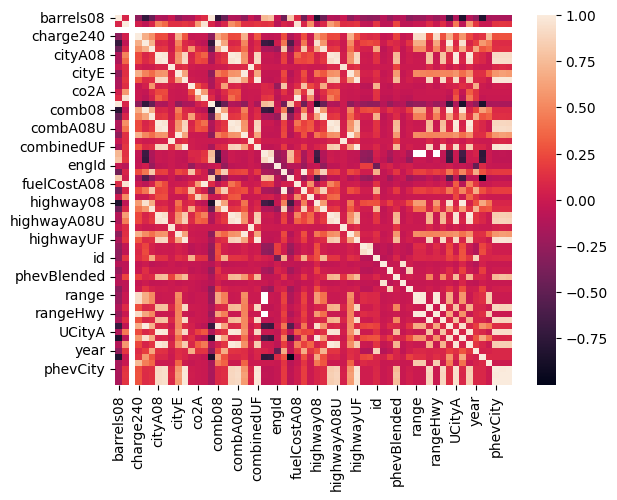

In [107]:
sns.heatmap(df.corr())

In [108]:
results = df.corr()

C:\Users\tabis\AppData\Local\Temp\ipykernel_12536\3172431781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  results = df.corr()


<Axes: >

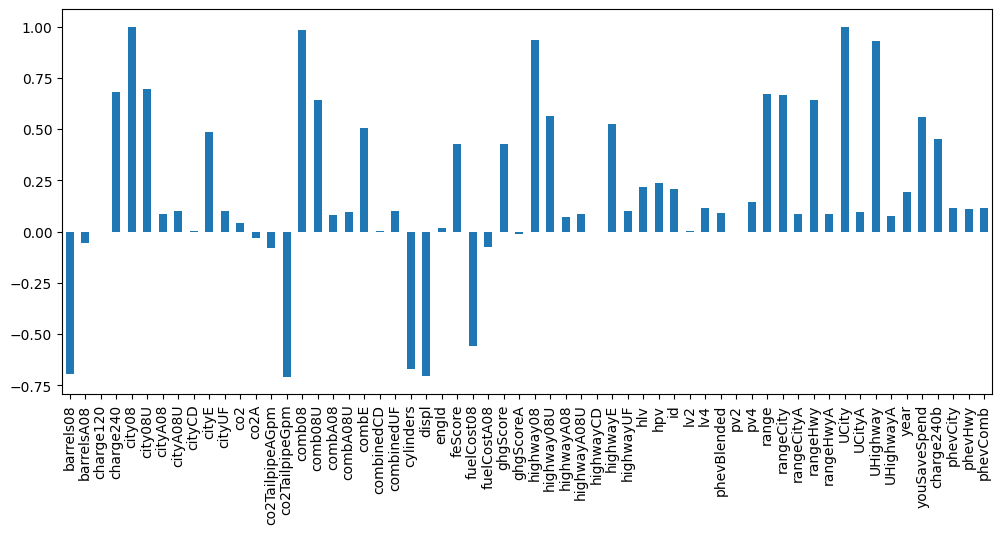

In [109]:
results.UCity.plot(kind='bar',figsize=(12,5))

In [110]:
features = [
    'co2TailpipeGpm','displ','barrels08','cylinders','fuelCost08','rangeHwy','comb08U','UHighway','highway08','comb08','city08'
]

In [111]:
X = df[features]

In [112]:
X.describe()

,co2TailpipeGpm,displ,barrels08,cylinders,fuelCost08,rangeHwy,comb08U,UHighway,highway08,comb08,city08
count,42215.000000,41978.000000,42215.000000,41976.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000,42215.000000
mean,464.331951,3.289654,17.210409,5.713598,1684.796873,0.905256,7.164687,34.549509,24.637901,20.753737,18.508895
std,124.332649,1.356746,4.647671,1.757895,510.198442,14.517377,12.816751,11.655846,8.020310,8.055950,8.348540
min,0.000000,0.000000,0.060000,2.000000,450.000000,0.000000,0.000000,0.000000,9.000000,7.000000,6.000000
25%,386.391304,2.200000,14.330870,4.000000,1300.000000,0.000000,0.000000,28.000000,20.000000,17.000000,15.000000
50%,444.350000,3.000000,16.480500,6.000000,1600.000000,0.000000,0.000000,33.333300,24.000000,20.000000,17.000000
75%,522.764706,4.300000,19.388824,6.000000,2000.000000,0.000000,17.382700,39.100000,28.000000,23.000000,21.000000
max,1269.571429,8.400000,47.087143,16.000000,5650.000000,358.555100,140.560300,187.100000,132.000000,141.000000,150.000000


In [113]:
X.cylinders.replace(np.nan, X.cylinders.mean(),inplace=True)

C:\Users\tabis\AppData\Local\Temp\ipykernel_12536\1033324211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.cylinders.replace(np.nan, X.cylinders.mean(),inplace=True)


In [114]:
nullval = X.isnull()
for col in nullval.columns:
    print(nullval[col].value_counts())
    print()
# displ col h null values

False    42215
Name: co2TailpipeGpm, dtype: int64

False    41978
True       237
Name: displ, dtype: int64

False    42215
Name: barrels08, dtype: int64

False    42215
Name: cylinders, dtype: int64

False    42215
Name: fuelCost08, dtype: int64

False    42215
Name: rangeHwy, dtype: int64

False    42215
Name: comb08U, dtype: int64

False    42215
Name: UHighway, dtype: int64

False    42215
Name: highway08, dtype: int64

False    42215
Name: comb08, dtype: int64

False    42215
Name: city08, dtype: int64



In [115]:
X.displ.replace(np.nan, X.displ.mean(),inplace=True)

C:\Users\tabis\AppData\Local\Temp\ipykernel_12536\3494856475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.displ.replace(np.nan, X.displ.mean(),inplace=True)


In [116]:
y = df.UCity

In [117]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=.2, random_state=0)

In [119]:
model = RandomForestRegressor()

In [120]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [121]:
model.score(xtest,ytest)

0.9986822341091787

In [122]:
model.fit(x_scaled, y) # full data training

RandomForestRegressor()

In [123]:
model.score(xtest,ytest)

0.9997456353814013

In [124]:
import pickle
with open('model.pk','wb') as file:
    pickle.dump(model, file)

In [125]:
import pickle
with open('scaler.pk','wb') as file:
    pickle.dump(scaler, file)